In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/home/tankinhbui/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
df_train = pd.read_csv('../input/train.csv')

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train.shape

(1460, 81)

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Biểu đồ tần suất:
1. Histogram(biểu đồ tần suất): dùng để tóm tắt phân phối dữ liệu.Dữ liệu được chia thành nhiều khoản có cùng độ dài, số điểm được tính trong mỗi khoảng và được vẽ như các thanh trong một biểu đồ tần suất.Trục tung (vertical axis) cho biết tỷ lệ của các quan sát trong mỗi thanh và chiều cao tương đối của các thanh thể hiện mật độ tương đối của số trường hợp (cases) trong các khoảng.
2. "fit = norm" đường phân phối chuẩn(Gauss).
3. Histogram áp dụng cho khi cần xem phân phối của dữ liệu, dữ liệu dạng số  có thể ngắt quãng.z

Tính chất của phân phối chuẩn:
 1. Hàm mật độ là đối xứng qua giá trị trung bình (giá trị kì vọng).
 2. Giá trị trung bình cũng là mode và trung vị của nó.

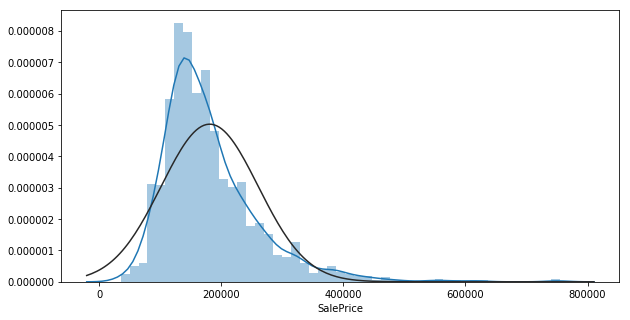

In [7]:
#histogram
plt.subplots(figsize = (10,5))
sns.distplot(df_train['SalePrice'], fit=norm)

- Độ nhọn(kurt()) của phân phối phản ánh độ cao của trung tâm phân phối so với phân phối chuẩn.
- kurtosis của phân phối chuẩn bằng 3.

- Độ lêch(skew()) đo sự cân bằng của phân phối so với phân phối chuẩn.
- Độ lệch được coi là đáng kể nếu giá trị tuyệt đối của nó ≥0.5 (tức là giá trị ≤−0.5 hoặc ≥+0.5)

In [8]:
print("skewness :", df_train['SalePrice'].skew()) #do lech so voi phan phoi chuan

skewness : 1.8828757597682129


In [9]:
print("kurtosis :", df_train['SalePrice'].kurt()) #do nhon 

kurtosis : 6.536281860064529


### Relationship with numerical variables

In [10]:
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
data.head()

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198


Biểu đồ phân tán(plot.scatter(x,y): 
- Vẽ một biến ở trục hoành theo mộtbiến khác ở trục tung.
- Đó là một phương pháp hữu ích để phân tích mối quanhệ giữa hai biến. Ví dụ, nó có thể làm rõ một mối quan hệ phi tuyến giữa hai biến hoặc nó có thể cho thấy có tồn tại các quan sát bất thường hay không.

##### GrLivArea: Above grade (ground) living area square feet

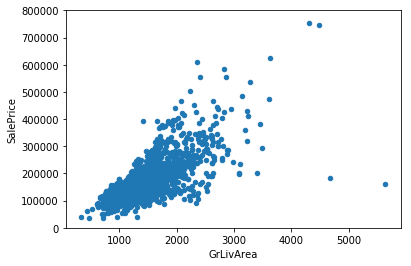

In [11]:
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim= (0,800000))

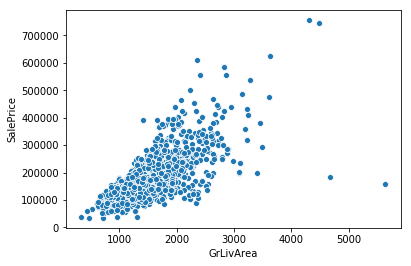

In [12]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data)

#### TotalBsmtSF: Total square feet of basement area

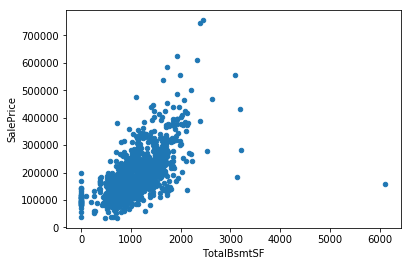

In [14]:
#scatter totalbmstsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['TotalBsmtSF'], df_train['SalePrice']], axis=1)
data.plot.scatter(x= var, y='SalePrice')

Nhận xét: 
1. GrLivArea có vẻ linear hơn TotalBsmtSF so với SalePrice.
2. GrLivArea và TotalBsmtSF điều có nhiễu(góc dưới bênh phải) cần phải loại bỏ.

### Relationship with categorical features

In [15]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


##### OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

In [16]:
var = 'OverallQual'
df_train[var].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [17]:
df_train[var].describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

std : độ lệch chuẩn.

Cách vẽ:

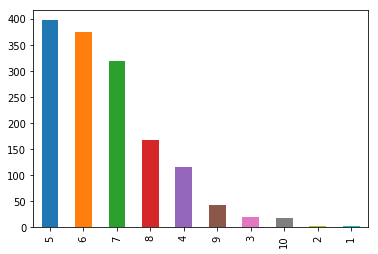

In [18]:
df_train[var].value_counts().plot(kind ='bar')

Hàm sns.countplot(data): hàm này truyền vào data origin, nó sẽ tự đếm số lượng rồi vẽ biểu đồ, giống như thuật toán lừa bò vào chuồng.

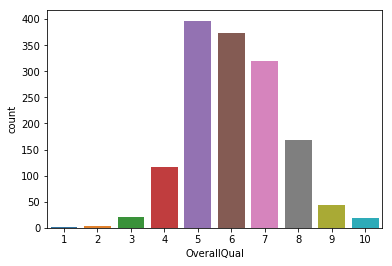

In [19]:
sns.countplot(df_train[var])

In [20]:
sum(df_train[var].value_counts())

1460

In [21]:
data = pd.concat([df_train[var], df_train['SalePrice']], axis=1)

In [22]:
df_train['OverallQual'].head()

0    7
1    6
2    7
3    7
4    8
Name: OverallQual, dtype: int64

Biểu đồ hộp cạnh – kề – cạnh(Boxplot):
1. Biểu đồ hộp cung cấp một dạng trình bày tóm tắt về phân phối của dữ liệu bằng cách cho ta thấy trên đồ thị các phân vị của dữ liệu.
2. Biểu đồ hộp cho biết trung tâm của phân phối (tức median hoặc phân vị thứ 50, Q 0.50 ), độ phân tán (spread) của toàn bộ dữ liệu (tức độ dài của hộp, là khoảng cách từ phân vị thứ 25 (Q 0.25 ) đến phân vị thứ 75 (Q 0.75 )), và các đuôi (tails) của phân phối được trải ra như thế nào (tức độ dài của các ‘râu’ so với hai đáy của chiếc hộp hình chữ nhật)
3. Bất cứ các điểm dữ liệu nào nằm ngoài khoảng của hai giá trị liền kề được gọi là các giá trị ngoại lai (outside values) hoặc cá biết, bất thường (outliers), vàđược vẽ như là một điểm riêng lẻ.

Cách dùng:
Các biểu đồ hộp cạnh – kề – cạnh là một tập hợp các biểu đồ hộp trình bày các phân phối của một số trường hợp hoặc một số biến theo một cách mà chúng ta có thể so sánh không chỉ các thước đo trung tâm mà còn các phân phối của các biến. Như chúng tôi đã đề cập ở trên, bề rộng của các biểu đồ hộp thường là tùy ý để chúng có thể được chia tỷ lệ theo một cách mà chúng ta có thể đặt chúng kế nhau miễn là các khoảng giá trị là tương tự về độ lớn để chúng có thể được vẽ trên cùng một trục tung.

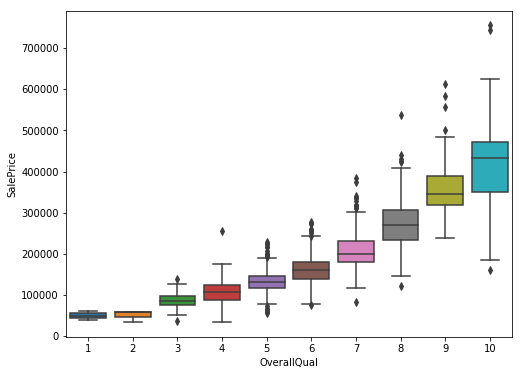

In [23]:
plt.subplots(figsize=(8,6))
sns.boxplot(x=var, y='SalePrice', data =data)

Nhận xét:
1. Đa phần điểm OverallQual tăng thì SalePrice nhà tăng theo.
2. Có nhiều outlayer.
3. Tại OverallQual bằng 10 SalePrice ít phụ thuộc vào điểm, có khi OverallQual = 10 lại có SalePrice thấp hơn SalePrice = 9. 

In [24]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)

In [25]:
df_train[var].value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1999    25
1998    25
1958    24
1965    24
1970    24
1954    24
2000    24
2002    23
2008    23
1972    23
1968    22
1971    22
1950    20
2001    20
1957    20
1962    19
1994    19
1966    18
2009    18
1995    18
1940    18
        ..
1986     5
1952     5
1880     4
1929     4
1932     4
1938     4
1983     4
1927     3
1919     3
1934     3
1989     3
1987     3
1912     3
1885     2
1892     2
1890     2
1942     2
1908     2
1882     1
1875     1
1893     1
2010     1
1898     1
1904     1
1905     1
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64

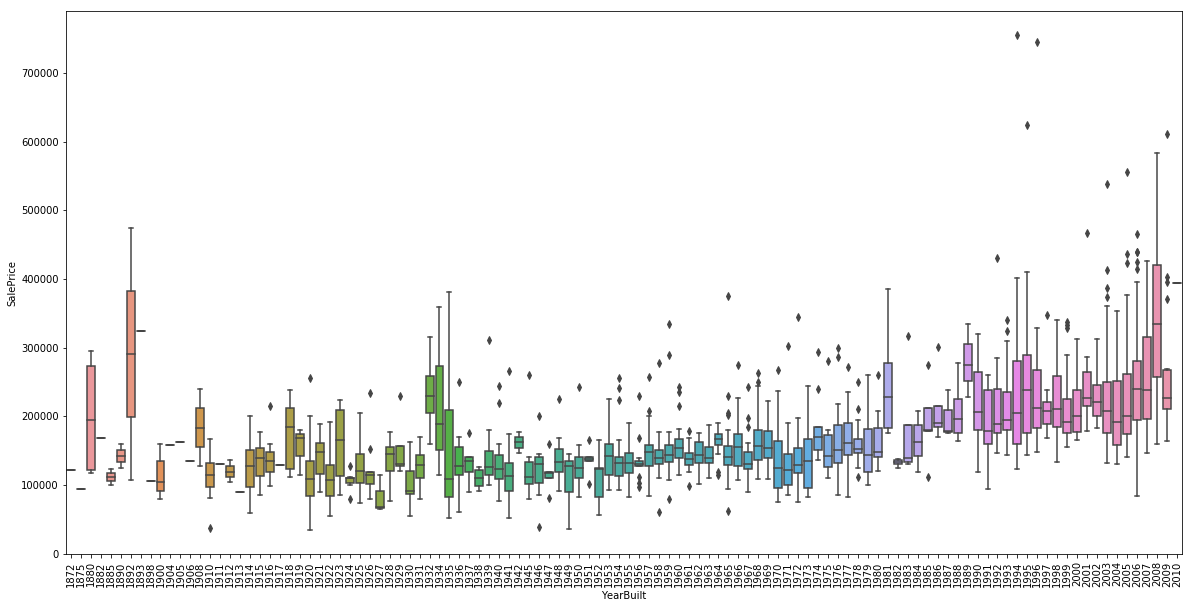

In [26]:
plt.subplots(figsize=(20,10))
sns.boxplot(x=var, y='SalePrice', data=data)
plt.xticks(rotation=90);#xoay tiêu đề trục x 90độ

SalePrice còn phụ thuộc vào một sô ngôi nhà đã cũ.

Kết luận:
1. GrLivArea và TotalBsmtSF điều linear với SalePrice.
2. TotalBsmtSF linear dốc hơn so vơi GrLivArea(tốc độ tăng salePrice nhanh hơn).
3. 'OverallQual' và 'YearBuilt' có ảnh hưởng tới SalePrice, 'OverallQual' có ảnh hưởng nhiều hơn 'YearBuilt'.

##### Biểu đồ tương quan(heatmap()):
    r = Cov(x,y)/(s(x)*s(y)) #s(x) độ lệch chuẩn của x.
Hệ số tương quan (correlation coefficient) là một thống kê phổ biến nhất được sử dụng để lượng hóa mối quan hệ giữa hai biến x và y.Giá trị tương quan(r) nằm giữa – 1 đến + 1, và đo lường mối quan hệ tuyến tính giữa x và y. Nếu r = 0, thì không có mối quan hệ tuyến tính nào; nếu r = 1, thì có mối quan hệ tuyến tính dương hoàn hảo; và nếu r = - 1, thì có mối quan hệ tuyến tính âm hoàn hảo.

In [27]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [28]:
df_train.MSZoning

0       RL
1       RL
2       RL
3       RL
4       RL
5       RL
6       RL
7       RL
8       RM
9       RL
10      RL
11      RL
12      RL
13      RL
14      RL
15      RM
16      RL
17      RL
18      RL
19      RL
20      RL
21      RM
22      RL
23      RM
24      RL
25      RL
26      RL
27      RL
28      RL
29      RM
        ..
1430    RL
1431    RL
1432    RL
1433    RL
1434    RL
1435    RL
1436    RL
1437    RL
1438    RM
1439    RL
1440    RL
1441    RM
1442    FV
1443    RL
1444    RL
1445    RL
1446    RL
1447    RL
1448    RL
1449    RM
1450    RL
1451    RL
1452    RM
1453    RL
1454    FV
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object

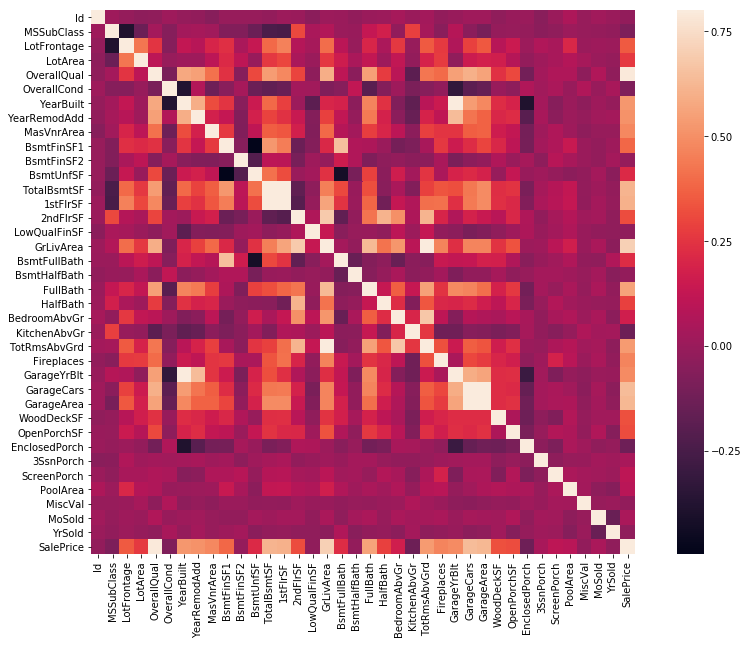

In [29]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize = (15,10))
sns.heatmap(corrmat, square=True, vmax=.8)

In [30]:
#saleprice correlation matrix
k = 10
#help(corrmat.nlargest)

Help on method nlargest in module pandas.core.frame:

nlargest(n, columns, keep='first') method of pandas.core.frame.DataFrame instance
    Return the first `n` rows ordered by `columns` in descending order.
    
    Return the first `n` rows with the largest values in `columns`, in
    descending order. The columns that are not specified are returned as
    well, but not used for ordering.
    
    This method is equivalent to
    ``df.sort_values(columns, ascending=False).head(n)``, but more
    performant.
    
    Parameters
    ----------
    n : int
        Number of rows to return.
    columns : label or list of labels
        Column label(s) to order by.
    keep : {'first', 'last'}, default 'first'
        Where there are duplicate values:
    
        - `first` : prioritize the first occurrence(s)
        - `last` : prioritize the last occurrence(s)
    
    Returns
    -------
    DataFrame
        The first `n` rows ordered by the given columns in descending
        order.


10 thành phần tương quan tuyến tính dương với SalePrice nhất.

In [31]:
#help(sns.heatmap)

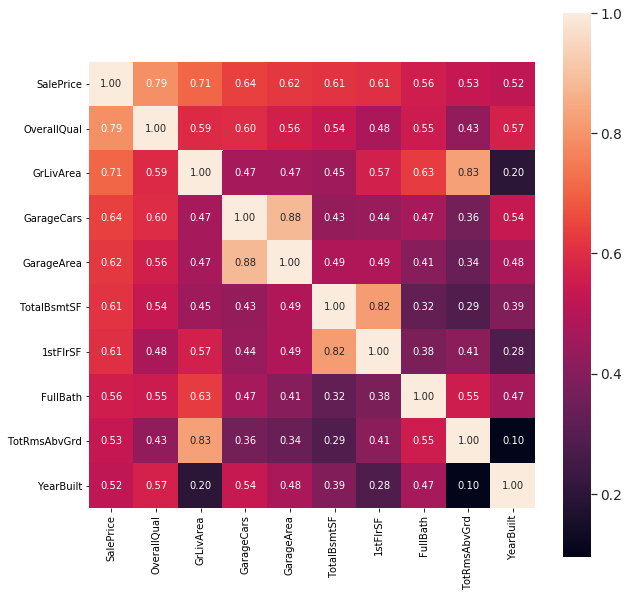

In [32]:
cols =corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(10,10))
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True,fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

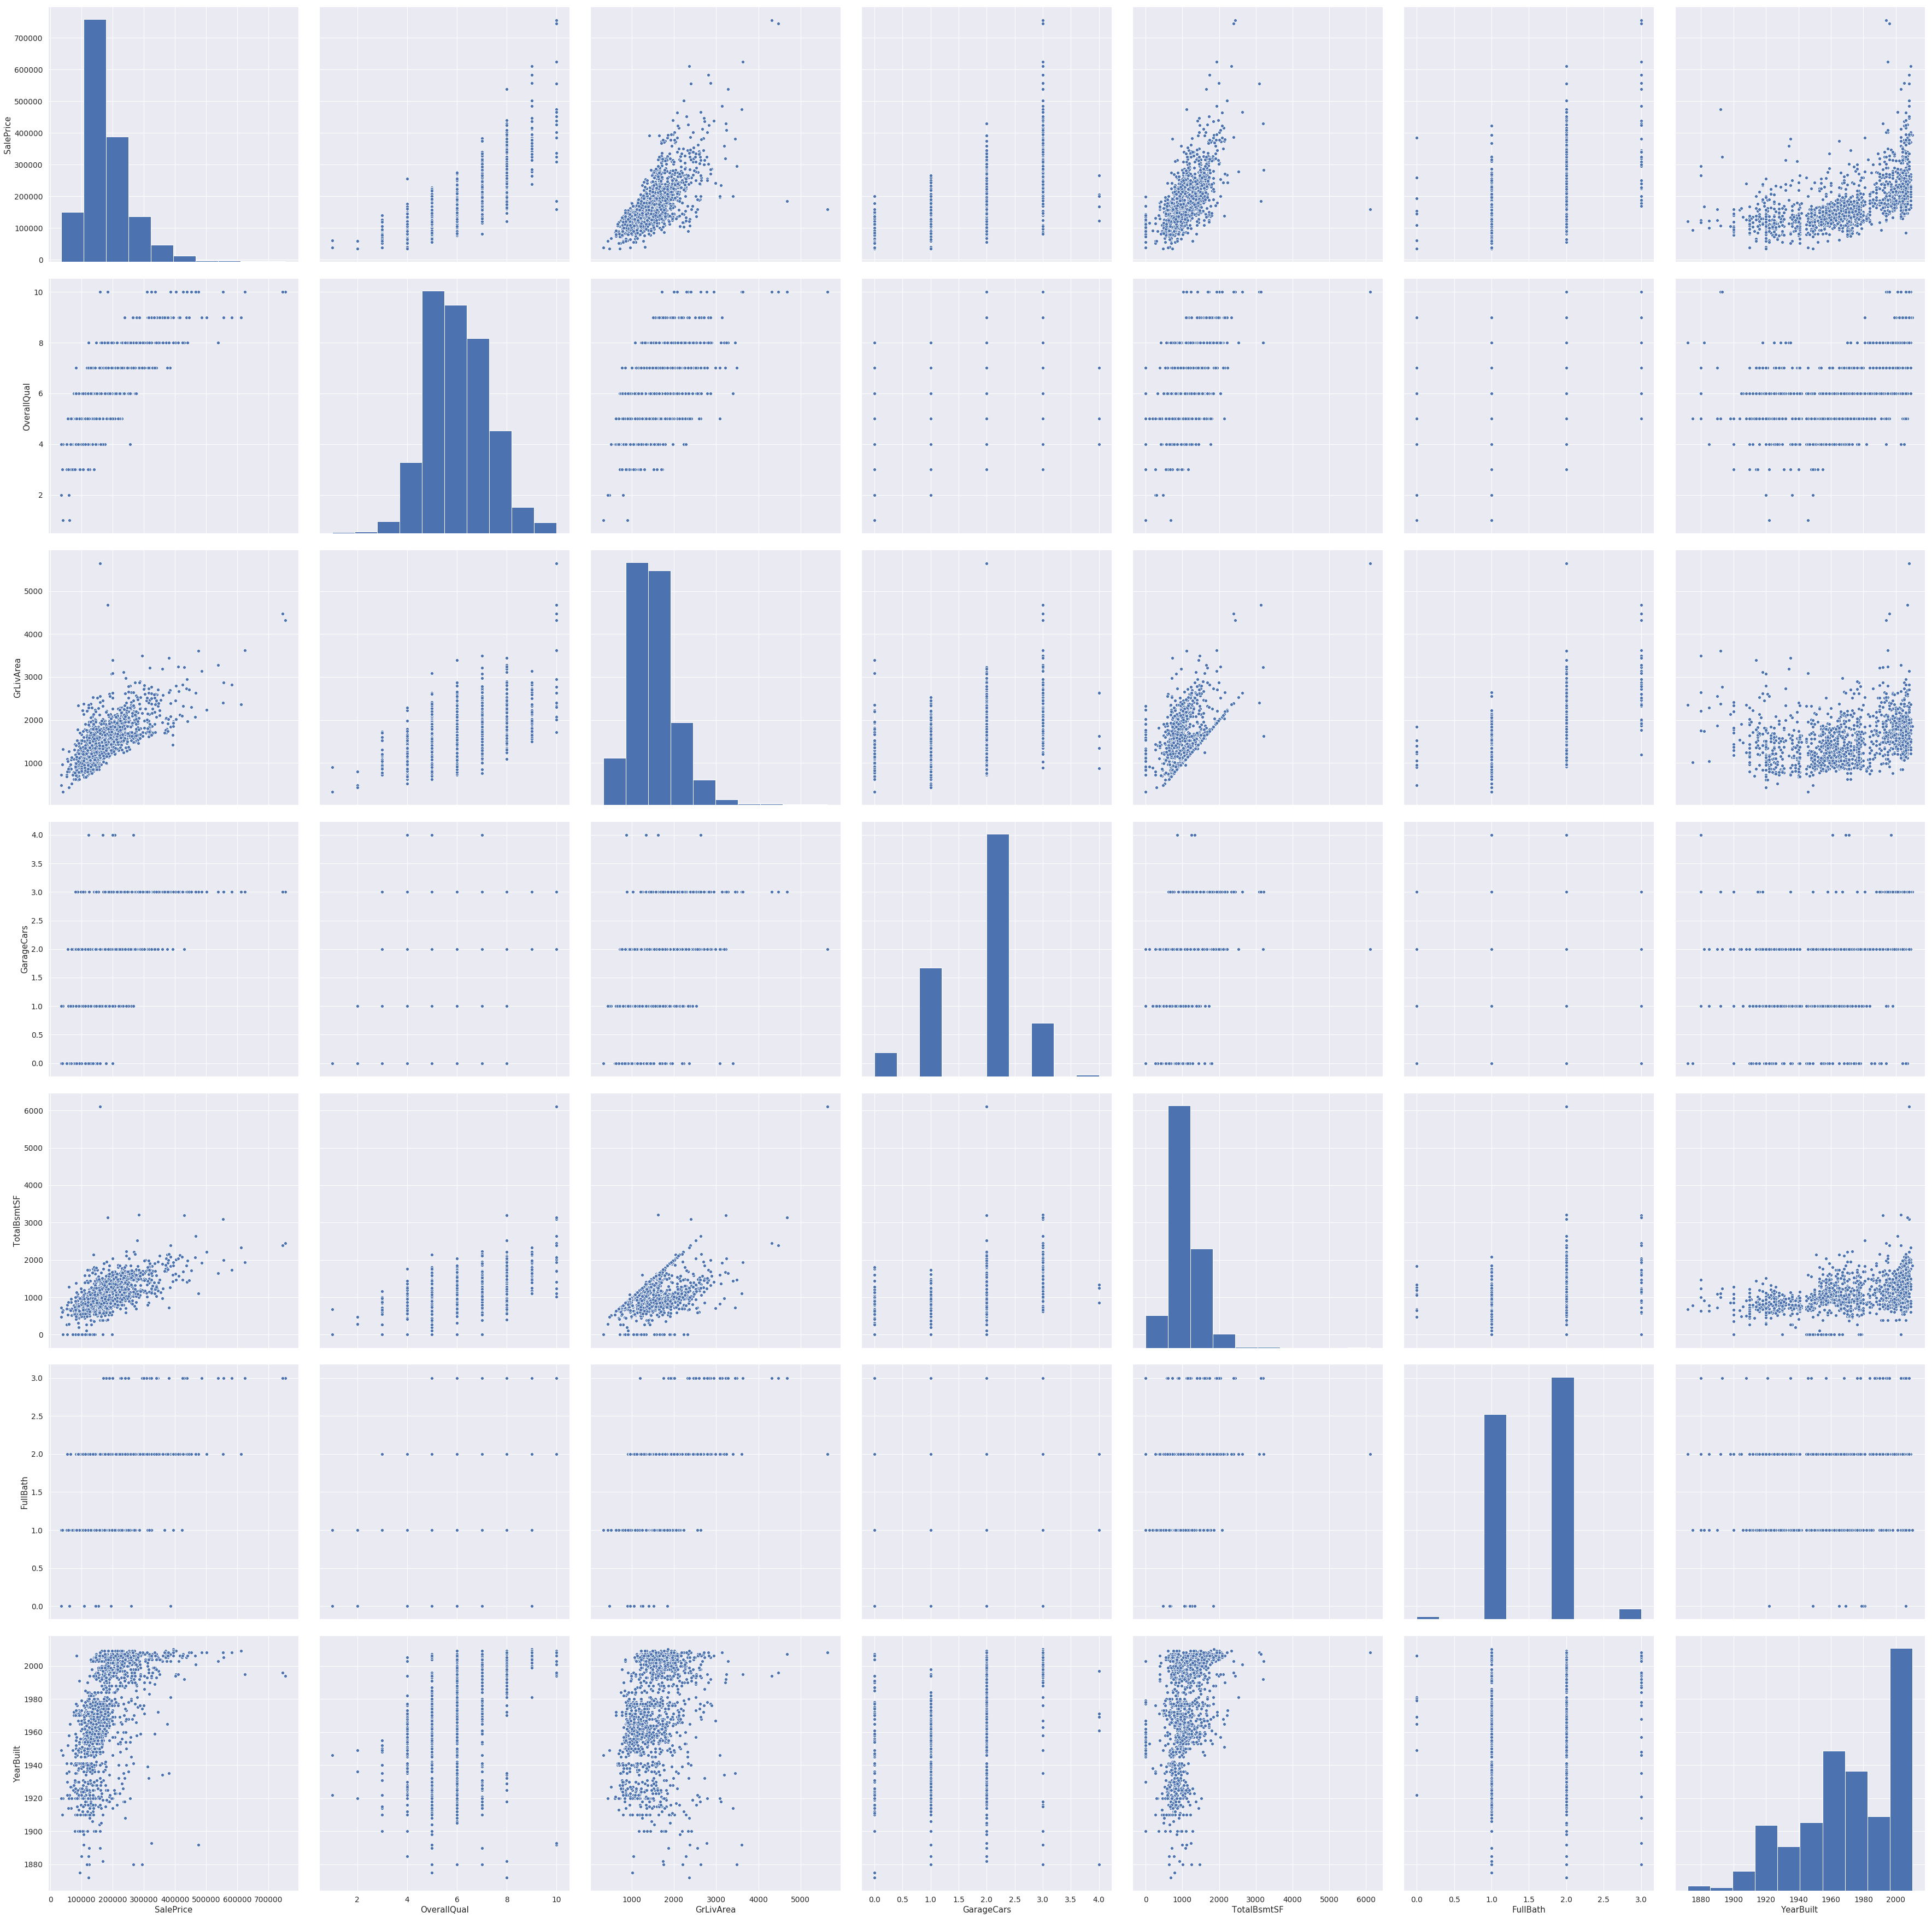

In [33]:
#scatterplot
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size=7)
plt.show()

### Missing data

In [34]:
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


1. PoolQC: Pool quality
2. MiscFeature: Miscellaneous feature not covered in other categories
3. Alley: Type of alley access to property
4. Fence: Fence quality
5. FireplaceQu: Fireplace quality

In [35]:
missing_data[missing_data['Total'] != 0.0].count()

Total      19
Percent    19
dtype: int64

In [36]:
missing_data.shape

(81, 2)

In [37]:
df_train['PoolQC']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
       ... 
1430    NaN
1431    NaN
1432    NaN
1433    NaN
1434    NaN
1435    NaN
1436    NaN
1437    NaN
1438    NaN
1439    NaN
1440    NaN
1441    NaN
1442    NaN
1443    NaN
1444    NaN
1445    NaN
1446    NaN
1447    NaN
1448    NaN
1449    NaN
1450    NaN
1451    NaN
1452    NaN
1453    NaN
1454    NaN
1455    NaN
1456    NaN
1457    NaN
1458    NaN
1459    NaN
Name: PoolQC, Length: 1460, dtype: object

In [38]:
df_train = df_train.drop((missing_data[missing_data['Total']>1]).index, 1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

In [39]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [43]:
df_train.LandSlope

0       Gtl
1       Gtl
2       Gtl
3       Gtl
4       Gtl
5       Gtl
6       Gtl
7       Gtl
8       Gtl
9       Gtl
10      Gtl
11      Gtl
12      Gtl
13      Gtl
14      Gtl
15      Gtl
16      Gtl
17      Gtl
18      Gtl
19      Gtl
20      Gtl
21      Gtl
22      Gtl
23      Gtl
24      Gtl
25      Gtl
26      Gtl
27      Gtl
28      Gtl
29      Gtl
       ... 
1430    Gtl
1431    Gtl
1432    Gtl
1433    Gtl
1434    Mod
1435    Gtl
1436    Gtl
1437    Gtl
1438    Gtl
1439    Gtl
1440    Mod
1441    Gtl
1442    Gtl
1443    Gtl
1444    Gtl
1445    Gtl
1446    Gtl
1447    Gtl
1448    Gtl
1449    Gtl
1450    Gtl
1451    Gtl
1452    Gtl
1453    Gtl
1454    Gtl
1455    Gtl
1456    Gtl
1457    Gtl
1458    Gtl
1459    Gtl
Name: LandSlope, Length: 1459, dtype: object

#### Transforming some numerical variables that are really categorical

In [97]:
#MSSubClass=The building class
df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
df_train['OverallCond'] = df_train['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
df_train['YrSold'] = df_train['YrSold'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)

#### Label Encoding some categorical variables that may contain information in their ordering set

In [98]:
#column with type is categorical
cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold']

In [99]:
a = df_train.columns.isin(cols)
np.where(a == True)

(array([ 1,  4,  5,  9, 16, 23, 24, 31, 32, 44, 46, 50, 58, 59]),)

In [100]:
#column remain after drop
cols_pre = df_train.columns[np.where(a == True)]

In [101]:
cols_pre

Index(['MSSubClass', 'Street', 'LotShape', 'LandSlope', 'OverallCond',
       'ExterQual', 'ExterCond', 'HeatingQC', 'CentralAir', 'KitchenQual',
       'Functional', 'PavedDrive', 'MoSold', 'YrSold'],
      dtype='object')

In [102]:
from sklearn.preprocessing import LabelEncoder

In [103]:
lbl = LabelEncoder()

In [104]:
# process columns, apply LabelEncoder to categorical features
for c in cols_pre:
    lbl = LabelEncoder() 
    lbl.fit(list(df_train[c].values)) 
    df_train[c] = lbl.transform(list(df_train[c].values))

# shape        
print('Shape all_data: {}'.format(df_train.shape))

Shape all_data: (1459, 63)


In [112]:
#df_train.KitchenQual

In [113]:
df_train.LandSlope.value_counts()

0    1381
1      65
2      13
Name: LandSlope, dtype: int64

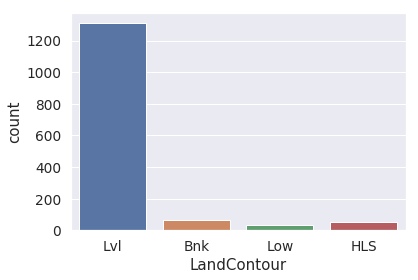

In [114]:
sns.countplot(df_train.LandContour)

In [115]:
df_train.shape

(1459, 63)

In [116]:
df_train['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [127]:
np.where(df_train.dtypes != 'object')

(array([ 0,  1,  3,  4,  5,  9, 15, 16, 17, 18, 23, 24, 26, 27, 28, 29, 31,
        32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
        50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 62]),)

In [129]:
df_train.columns[np.where(df_train.dtypes != 'object')]

Index(['Id', 'MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual',
       'ExterCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [132]:
numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index

In [133]:
numeric_feats

Index(['Id', 'MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual',
       'ExterCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [135]:
from scipy.stats import skew
# Check the skew of all numerical features
skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.443278
PoolArea,14.807992
LotArea,12.190881
3SsnPorch,10.290132
LowQualFinSF,8.998885
LandSlope,4.806884
KitchenAbvGr,4.482026
BsmtFinSF2,4.249219
ScreenPorch,4.116334
BsmtHalfBath,4.097541


#### MiscVal: $Value of miscellaneous feature

In [137]:
df_train.MiscVal.value_counts()

0        1407
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

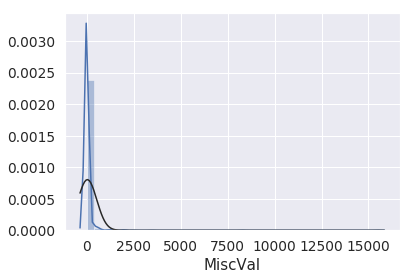

In [140]:
sns.distplot(df_train.MiscVal, fit=norm)

In [141]:
df_train.MiscVal.skew()

24.468441010668204

Độ nhọn(skew) của MiscVal quá cao so với chuẩn( skew chuẩn là 3).

In [142]:
from scipy.special import boxcox1p
sk = boxcox1p(df_train.MiscVal, 0.15)

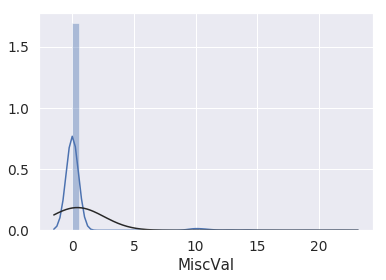

In [143]:
sns.distplot(sk, fit=norm)

In [151]:
sk.skew()

5.50912746811769

In [153]:
sk_M.skew()

5.168742031682324

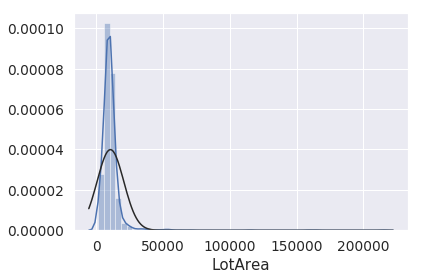

In [144]:
sns.distplot(df_train.LotArea, fit=norm)

In [145]:
sk_lotArea = boxcox1p(df_train.LotArea, 0.15)

In [150]:
df_train.LotArea.dropna().skew()

12.203431161608322

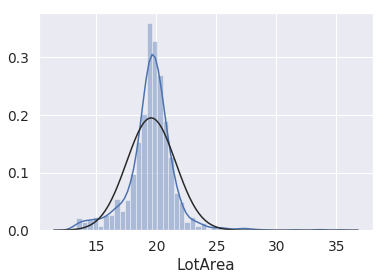

In [146]:
sns.distplot(sk_lotArea, fit=norm)

In [156]:
df_train.MSZoning.value_counts()

RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [157]:
#help(StandardScaler().fit_transform)

In [158]:
np.newaxis

#### Getting dummy categorical features

In [161]:
df_train = pd.get_dummies(df_train)
print(df_train.shape)

(1459, 193)


### Out liars!

Chuẩn hóa các dữ liệu thành có giá trị trung bình là 0 và độ lệch chuẩn là 1.

Chuẩn hóa giúp cho hội tụ nhanh hơn(nguyên nhân lên course machine learning Andrew Ng coi).

Độ lệch chuẩn, hay độ lệch tiêu chuẩn, là một đại lượng thống kê mô tả dùng để đo mức độ phân tán của một tập dữ liệu đã được lập thành bảng tần số. Có thể tính ra độ lệch chuẩn bằng cách lấy căn bậc hai của phương sai.

#### Univariate analysis

In [193]:
#standardring data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:, np.newaxis])

In [194]:
saleprice_scaled

array([[ 0.55962043],
       [ 0.2126651 ],
       [ 0.73342502],
       ...,
       [ 1.1736453 ],
       [-0.39914194],
       [-0.30627281]])

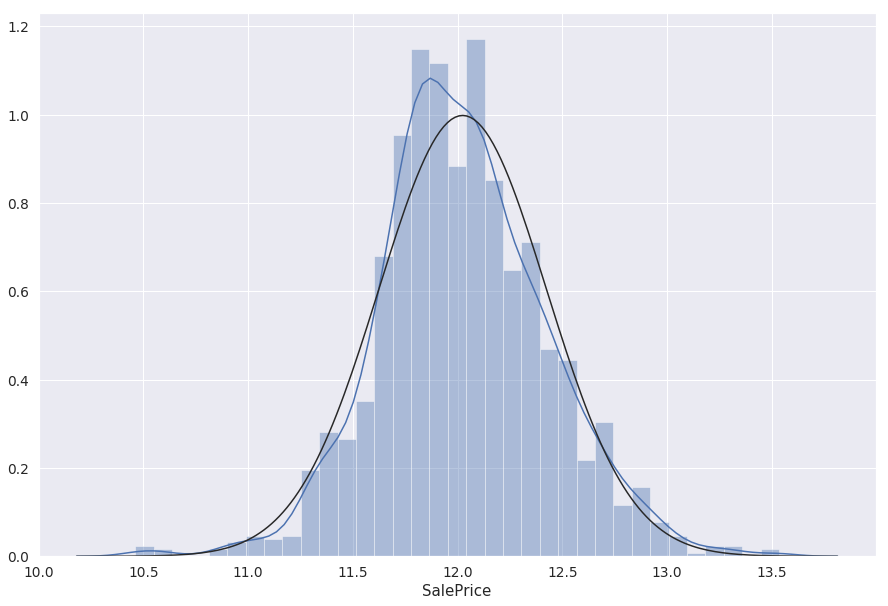

In [195]:
fig = plt.figure(figsize= (15,10))
sns.distplot(df_train['SalePrice'], fit=norm)

In [196]:
saleprice_scaled.shape

(1457, 1)

In [197]:
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

In [198]:
saleprice_scaled.mean()

-3.42469894432073e-15

In [199]:
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-3.91219174]
 [-3.88290165]
 [-3.70588425]
 [-3.61513617]
 [-3.5709674 ]
 [-2.91458974]
 [-2.89064908]
 [-2.77426623]
 [-2.77426623]
 [-2.72950064]]

outer range (high) of the distribution:
[[2.67164773]
 [2.75702466]
 [2.93110651]
 [3.00893577]
 [3.01605233]
 [3.13178353]
 [3.25211767]
 [3.30610604]
 [3.74550008]
 [3.77885764]]


#### Bivariate analysis


In [200]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)

In [201]:
data.shape

(1457, 2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


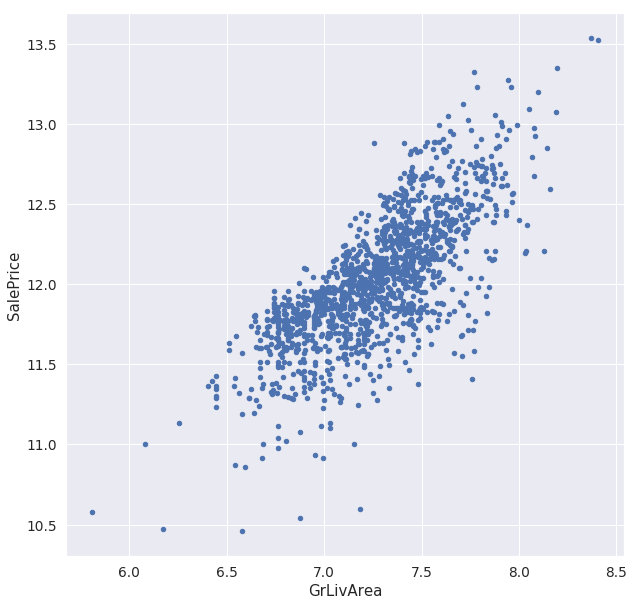

In [202]:
data.plot.scatter(x = var, y = 'SalePrice', figsize = (10,10))

nhận xét:
1. 2 điểm xanh có GrLivArea lớn và giá thấp đó chính là outlier 
2. 2 điểm xanh có GrLivArea cỡ 4200 và SalePrice cao nhất đó có thể là 2 điểm mà khi chuẩn hóa thành saleprice_scaled có giá trị >7.0

In [203]:
#deleting point
#help(df_train.sort_values)

In [204]:
df_train.sort_values(by='GrLivArea', ascending=False)[:2] #df_train chi sort va hien ra, gia tri va vi tri cua van ko thya doi

,Id,MSSubClass,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,HasBsmt
1182,1183,10,15623,1,0,0,10,4,1996,1996,...,0,0,1,1,0,0,0,0,0,0
691,692,10,21535,1,0,0,10,5,1994,1995,...,0,0,1,0,0,0,0,1,0,0


In [205]:
df_train[['Id','GrLivArea']]

,Id,GrLivArea
0,1,7.444249
1,2,7.140453
2,3,7.487734
3,4,7.448334
4,5,7.695303
5,6,7.216709
6,7,7.434848
7,8,7.644919
8,9,7.480992
9,10,6.981935


In [206]:
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

In [207]:
df_train[df_train['Id'] == 1299]

,Id,MSSubClass,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,HasBsmt


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


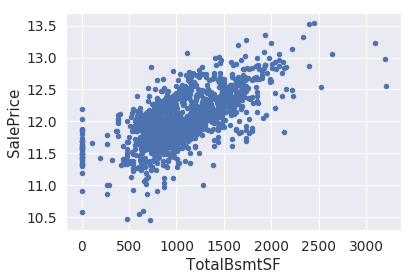

In [208]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x= var, y= 'SalePrice')

In [209]:
#delete data
df_train.sort_values(by='TotalBsmtSF', ascending=False)[:2]

,Id,MSSubClass,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,HasBsmt
332,333,0,10655,1,0,0,8,4,2003,2004,...,0,0,1,0,0,0,0,1,0,0
496,497,0,12692,1,0,0,8,4,1992,1993,...,0,0,1,0,0,0,0,1,0,0


### Getting hard core

#### In the search for normality

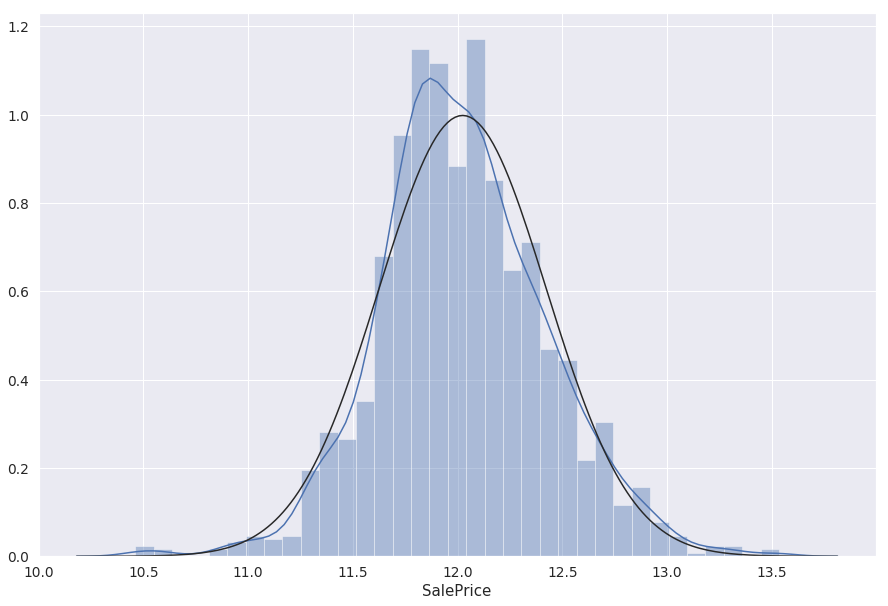

In [210]:
#histogram and normal probability plot
fig =plt.figure(figsize=(15,10))
sns.distplot(df_train['SalePrice'], fit=norm)


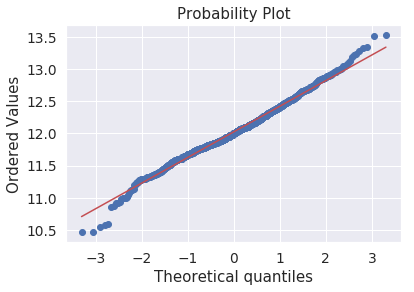

In [211]:
res = stats.probplot(df_train['SalePrice'], plot=plt)

Skewness(độ nghiêng) dương(nghiêng sang trái) và các điểm ko đi theo đường chéo

In [212]:
#tranformation follow log
df_train['SalePrice'] =np.log(df_train['SalePrice'])

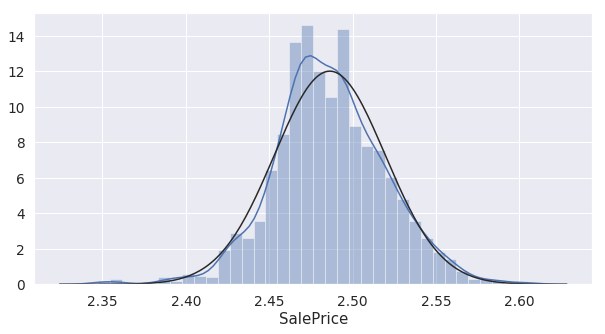

In [213]:
fig = plt.figure(figsize = (10,5))
sns.distplot(df_train['SalePrice'], fit=norm)

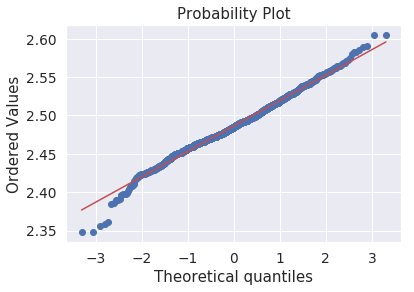

In [214]:
res = stats.probplot(df_train['SalePrice'], plot=plt)

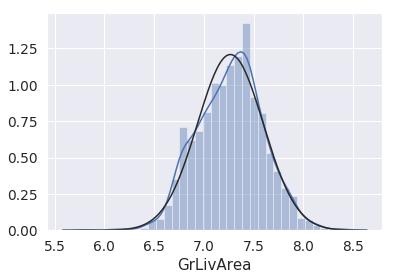

In [215]:
#GrLivArea
sns.distplot(df_train['GrLivArea'], fit=norm)

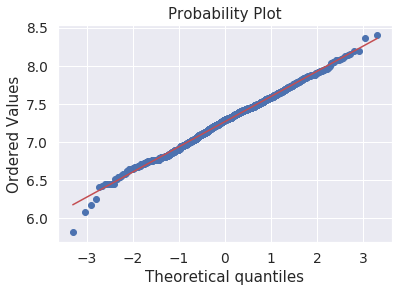

In [216]:
res = stats.probplot(df_train['GrLivArea'], plot=plt)

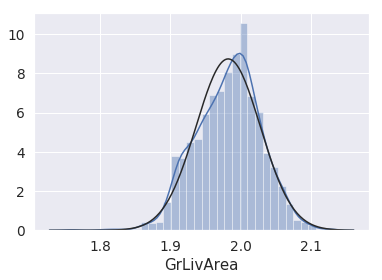

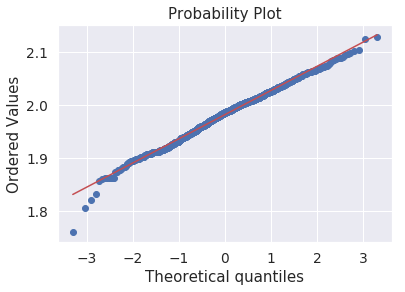

In [217]:
#apply log tranformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
sns.distplot(df_train['GrLivArea'], fit=norm)
fig = plt.figure()
res =stats.probplot(df_train['GrLivArea'], plot=plt)

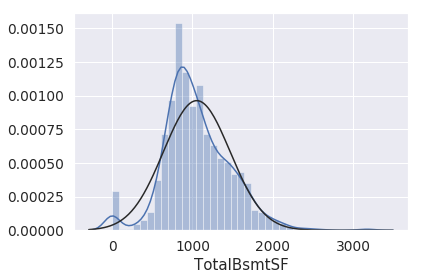

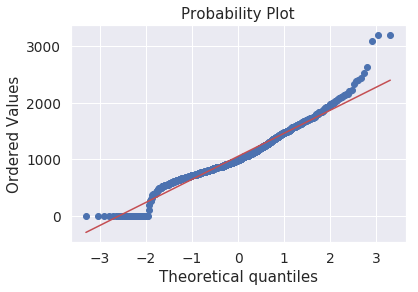

In [218]:
sns.distplot(df_train['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [219]:
df_train['TotalBsmtSF'].head()

0     856
1    1262
2     920
3     756
4    1145
Name: TotalBsmtSF, dtype: int64

In [220]:
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)

In [221]:
df_train.columns

Index(['Id', 'MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       ...
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'HasBsmt'],
      dtype='object', length=194)

In [222]:
df_train['HasBsmt'] = 0

In [223]:
help(df_train.loc())

Help on _LocIndexer in module pandas.core.indexing object:

class _LocIndexer(_LocationIndexer)
 |  Access a group of rows and columns by label(s) or a boolean array.
 |  
 |  ``.loc[]`` is primarily label based, but may also be used with a
 |  boolean array.
 |  
 |  Allowed inputs are:
 |  
 |  - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
 |    interpreted as a *label* of the index, and **never** as an
 |    integer position along the index).
 |  - A list or array of labels, e.g. ``['a', 'b', 'c']``.
 |  - A slice object with labels, e.g. ``'a':'f'``.
 |  
 |    .. warning:: Note that contrary to usual python slices, **both** the
 |        start and the stop are included
 |  
 |  - A boolean array of the same length as the axis being sliced,
 |    e.g. ``[True, False, True]``.
 |  - A ``callable`` function with one argument (the calling Series, DataFrame
 |    or Panel) and that returns valid output for indexing (one of the above)
 |  
 |  See more at :ref:`Selection 

In [224]:
df_train.loc[df_train['TotalBsmtSF'] > 0, 'HasBsmt'] = 1

In [225]:
df_train[df_train['HasBsmt'] == 1]['HasBsmt'].value_counts()

1    1420
Name: HasBsmt, dtype: int64

In [226]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

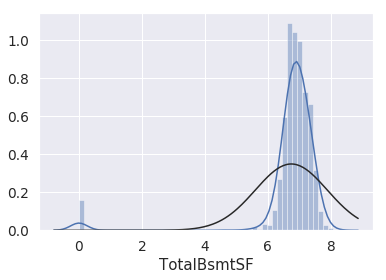

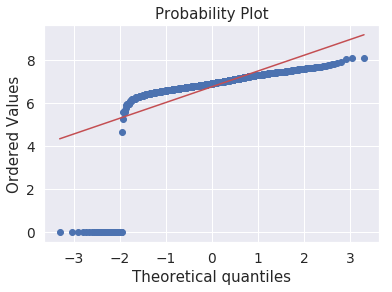

In [227]:
sns.distplot(df_train['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [228]:
df_train.shape

(1457, 194)

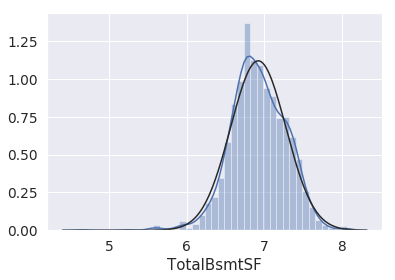

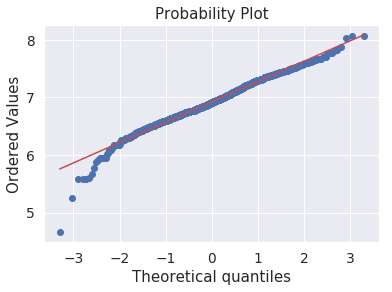

In [229]:
sns.distplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], plot=plt)

Text(0, 0.5, 'SalePrice')

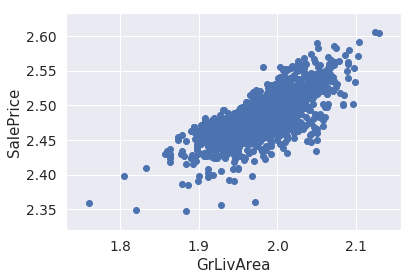

In [230]:
fig = plt.figure()
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

Lúc ban đầu đồ thị khi biểu diễn quan hệ giữ 'GrLivArea' và 'SalePrice' có hình nón. Sau khi tranfer đồi thị biểu diễn chúng đã ko còn hình nón. Đã giải quyết được vấn đề đồng nhất (homoscedasticity).

Text(0, 0.5, 'SalePrice')

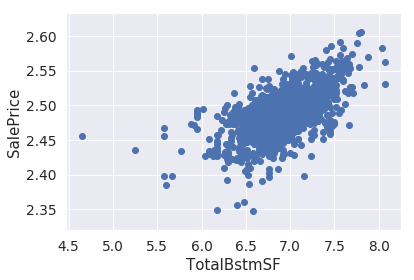

In [231]:
plt.scatter(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF'] > 0]['SalePrice'])
plt.xlabel('TotalBstmSF')
plt.ylabel('SalePrice')

In [232]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)

In [233]:
df_train.head()

,Id,MSSubClass,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,HasBsmt
0,1,10,8450,1,3,0,7,4,2003,2003,...,0,0,1,0,0,0,0,1,0,1
1,2,0,9600,1,3,0,6,7,1976,1976,...,0,0,1,0,0,0,0,1,0,1
2,3,10,11250,1,0,0,7,4,2001,2002,...,0,0,1,0,0,0,0,1,0,1
3,4,11,9550,1,0,0,7,4,1915,1970,...,0,0,1,1,0,0,0,0,0,1
4,5,10,14260,1,0,0,8,4,2000,2000,...,0,0,1,0,0,0,0,1,0,1


In [234]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [101]:
train = df_train[0:-1]

In [103]:
y_train = df_train['SalePrice']

In [104]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [105]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [106]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ValueError: Found input variables with inconsistent numbers of samples: [1456, 1457]